In [279]:
import numpy as np
import pandas as pd
from osgeo import gdal
from gdalconst import *
#import osr
import matplotlib.pyplot as plt
%matplotlib qt

#Import bokeh 
from bokeh.plotting import *
from bokeh.models import ColumnDataSource, Label
from bokeh.layouts import layout

#package in this working directory
from utils.colormap import RGBAColorMapper
import netCDF4
from bokeh.palettes import RdBu11
#import color palettes for plotting raster
from bokeh.palettes import *


#Import dependencies and data for interactive map plot

import pandas as pd
import geopandas as gpd
from bokeh.models import HoverTool
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
import pysal as ps



output_notebook()


Loading BokehJS ...

In [155]:
#Import the data

#Read a raster
Test_data = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/"
Test = gdal.Open(Test_data + "/Mandakini.bil")#Get raster data
M_DEM = Test.ReadAsArray()

#Read stream data
name = "Mandakini_fullProfileMC_forced_0.45_3_1258909000_10_80_281_for_Arc.csv" #Set file name
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/" #Set path to data
#for csv files
data = np.genfromtxt((path+name), delimiter=',', skip_header=1, names=['id', 'x', 'y', 'chan_number', 'reciever_chan','node_on_reciever_chan', 'node', 'row','column', 'flow_distance', 'chi', 'elevation', 'drainage_area', 'n_data_points', 'm_mean','m_st_dev', 'm_std_err', 'b_mean', 'b_st_dev', 'b_std_err', 'DW_mean', 'DW_st_dev', 'DW_std_err', 'fitted_elev_mean', 'fitted_elev_stdev', 'fitted_elev_std_err'])
#for tree files
#data = np.genfromtxt((path+name), delimiter=' ', skip_header=1, names=['chan_number', 'reciever_chan','node_on_reciever_chan', 'node', 'row','column', 'flow_distance', 'chi', 'elevation', 'drainage_area', 'n_data_points', 'm_mean','m_st_dev', 'm_std_err', 'b_mean', 'b_st_dev', 'b_std_err', 'DW_mean', 'DW_st_dev', 'DW_std_err', 'fitted_elev_mean', 'fitted_elev_stdev', 'fitted_elev_std_err'])


In [171]:
#Try to polygonize shapefile

# import rasterio
# from rasterio.features import shapes
# from osgeo import gdal, ogr, osr
# import sys


# Test_data = ("/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/Mandakini.bil")
# Test = gdal.Open(Test_data)
# Test_band = Test.GetRasterBand(1)
# out = "export.shp"





In [282]:
#playing with Pandas to plot data


grid_fp = '/Users/bmelosh/projects/LSDTopoTools/MandakiniSHP/MandakiniSHP.shp'
grid = gpd.read_file(grid_fp)

import pandas as pd

data = pd.read_csv((path))

df = pd.DataFrame(data)

unique_channels = df.channel_number.unique() #display different channels
print(len(unique_channels))

a = df.loc[df['channel_number'] == 0]
b = df.loc[df['channel_number'] == 1]
c = df.loc[df['channel_number'] == 2]
d = df.loc[df['channel_number'] == 3]
e = df.loc[df['channel_number'] == 4]

grouped = df.groupby('channel_number')

#for loop for dividing up the channel data
# b = []
# for i in range(0, len(unique_channels)): 
#     a = df.loc[df['channel_number'] == i]
#     a.
grouped['elevation'].mean()


# for i, group in grouped:
#     #plt.figure()
#     group.plot(x='x', y='y', title=str(i))


5


channel_number
0    1635.430145
1    1515.539411
2    1248.108796
3    1180.970647
4    1340.490866
Name: elevation, dtype: float64

In [283]:
#for i in range(0, len(grouped)):
x = a['x']
y = a['y']
x2 = b['x']
y2 = b['y']

from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS

#output_file("hover_callback.html")

# Basic plot setup
p = figure(width=600, height=300, x_axis_type="datetime", tools="", toolbar_location=None, title='Hover over points')
p.line(x, y, line_dash="4 4", line_width=1, color='gray')
p.line(x2, y2, line_dash="4 4", line_width=1, color='gray')

# Add a circle, that is visible only when selected
source = ColumnDataSource({'x': x, 'y': y})
invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
cr = p.add_glyph(source, invisible_circle, selection_glyph=visible_circle, nonselection_glyph=invisible_circle)

# Add a hover tool, that selects the circle
code = "source.set('selected', cb_data['index']);"
callback = CustomJS(args={'source': source}, code=code)
p.add_tools(HoverTool(tooltips=None, callback=callback, renderers=[cr], mode='hline'))

show(p)

AttributeError: 'InteractiveImage' object has no attribute 'references'

In [39]:
#%pwd
#%cd LSDTopoTools
#%pwd
newpath = %pwd
newpath

u'/Users/bmelosh/projects/LSDTopoTools'

In [30]:
quickref  #For a quick reference of jupyter notebook shortcuts.

In [284]:
from pyproj import transform, Proj
import numpy as np
from bokeh.models.ranges import Range1d

#input_proj = Proj(init='epsg:4326') #geographic
#output_proj = Proj(init='epsg:3857') #web mercator
input_proj = Proj(init='epsg:32644')
output_proj = Proj(init='epsg:32644') 

xmin_lng = 280000 #-139 #
#, 3350000 (bottom left) 345000, 3410000 (top right)
xmax_lng = 345000#-50

ymin_lat = 3350000#20

ymax_lat = 3410000 #55


xmin_meters, ymin_meters = transform(input_proj, output_proj, xmin_lng, ymin_lat)
xmax_meters, ymax_meters = transform(input_proj, output_proj, xmax_lng, ymax_lat)

#reporjecting can be vectorized
x_longitudes = np.array([280000, 345000])
y_latitudes = np.array([3350000, 3410000])
x_meters, y_meters = transform(input_proj, output_proj, x_longitudes, y_latitudes)

#Bokeh 1D Ranges 
x_range = Range1d(*x_meters)
y_range = Range1d(*y_meters)

print(x_meters)
print(x_range)
print(xmin_lng, xmin_meters)




#load data
newpath = '/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/'
raster_data = rio.open(newpath+'Mandakini.bil')
xmin= 280000
ymin = 3350000
xmax = 345000
ymax = 3410000 #3632767
ymin

[ 280000.  345000.]
Range1d(id='b187c6d3-9280-41dc-8750-78273564a635', ...)
(280000, 279999.9999999999)


3350000

In [71]:
quickref


In [157]:
#Importing raster data. 

from datashader.bokeh_ext import InteractiveImage, HoverLayer
import datashader as ds
import datashader.transfer_functions as tf
import rasterio as rio
from bokeh.plotting.figure import Figure
from skimage.transform import resize

output_notebook()

Loading BokehJS ...

In [277]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno

background = "black"

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))


def base_plot(tools='pan,wheel_zoom,reset',plot_width=900, plot_height=600, x_range=None, y_range=None, **plot_args):
    p = Figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
              x_range=x_range, y_range=y_range, outline_line_color=None,
              min_border=0, min_border_left=0, min_border_right=0,
              min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #p.add_title(STAMEN_TONER, alpha=0.5)
    return p



def basic_raster(x_range, y_range, w, h, how='log'):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.raster(raster_data)
    return tf.shade(agg, cmap=cm(inferno), how='linear', alpha=255) #tf.interpolate(...cmap=['darkred', 'white', 'darkblue'])

f = base_plot(x_range=(280000, 345000), y_range=(3350000, 3410000))


hover_layer = HoverLayer(agg=datashader_agg,
                          extent=extent,
                          field_name='elevation')

f.renderers.append(hover_layer.renderer)
f.add_tools(hover_layer.tool)
glyph = ds.glyphs.Point(pdata['x'], pdata['y'])

ii = InteractiveImage(f, basic_raster)

p = figure(title="Stream channel elevation map")
p.circle(pdata['x'], pdata['y'], source=source, color='red', size=6)


ii

# put the subplots in a gridplot
#lay = layout([[left, right], [topo]])






/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source

In [158]:
##HoverLayer example
from bokeh.io import output_notebook, show
from bokeh.plotting import Figure

import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf

from datashader.colors import Hot

from datashader.bokeh_ext import HoverLayer

output_notebook()

Loading BokehJS ...

In [159]:
path = '/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/Mandakini_fullProfileMC_forced_0.45_3_1258909000_10_80_281_for_Arc.csv'

df = pd.read_csv(path, usecols=['x', 'y', 'flow_distance', 'elevation', 'chi'])
#df.head()
#df['hour'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.hour
df['elevation_cat'] = pd.cut(df['elevation'], bins=[0, 1000, 1500, 2700], labels=['low', 'mid', 'high']).astype('category')
#df.head(len(df))


In [160]:
df.head()

x            y  flow_distance         chi  elevation  \
0  328128.8534  3376368.352    48393.25000  169.116333     2617.0   
1  328040.0409  3376368.352    48304.43750  166.669403     2610.0   
2  327951.2284  3376368.352    48215.62500  164.225433     2584.0   
3  327862.4159  3376457.102    48090.02344  160.797958     2571.0   
4  327773.6034  3376457.102    48001.21094  158.416367     2562.0   

  elevation_cat  
0          high  
1          high  
2          high  
3          high  
4          high

In [58]:

def create_base_plot():
    
    # data is in meters
#     xmin = 314000
#     ymin = 3368000
#     xmax = 332000
#     ymax = 3380000
    
    #Define plot canvas area
    cvs = ds.Canvas(plot_width=900,
                    plot_height=600,
                    x_range=(xmin, xmax),
                    y_range=(ymin, ymax))
    
    #
    agg = cvs.points(df, 'x', 'y', ds.mean('elevation'))
    img = tf.shade(agg, cmap=cm(inferno), how='log')
    fig = Figure(x_range=(xmin, xmax),
                 y_range=(ymin, ymax),
                 plot_width=900,
                 plot_height=600,
                 tools='')
    
    fig.background_fill_color = 'black'
    fig.toolbar_location = None
    fig.axis.visible = False
    fig.grid.grid_line_alpha = 0
    fig.min_border_left = 0
    fig.min_border_right = 0
    fig.min_border_top = 0
    fig.min_border_bottom = 0

    fig.image_rgba(image=[img.data],
                   x=[xmin],
                   y=[ymin],
                   dw=[xmax-xmin],
                   dh=[ymax-ymin])
    return fig, (xmin, ymin, xmax, ymax), agg

fig, extent, datashader_agg = create_base_plot()

#

In [59]:
#define area in utm coord.
xmin = 314000
ymin = 3368000
xmax = 332000
ymax = 3380000

fig, extent, datashader_agg = create_base_plot()

hover_layer = HoverLayer(agg=datashader_agg,
                         extent=extent,
                         field_name='elevation')

fig.renderers.append(hover_layer.renderer)
fig.add_tools(hover_layer.tool)
show(fig)

/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


AttributeError: 'InteractiveImage' object has no attribute 'references'

In [161]:
#may 8th , monday, plotting coordinates and datashader rasters
cvs = ds.Canvas(plot_width=900,
                    plot_height=600,
                    x_range=(xmin, xmax),
                    y_range=(ymin, ymax))


#%time tf.shade(cvs.points(df,'x','y'))
glyph = ds.glyphs.Point('x', 'y')

from datashader import reductions
reduction = reductions.count()

from datashader.core import bypixel
agg = bypixel(df, cvs, glyph, reduction)



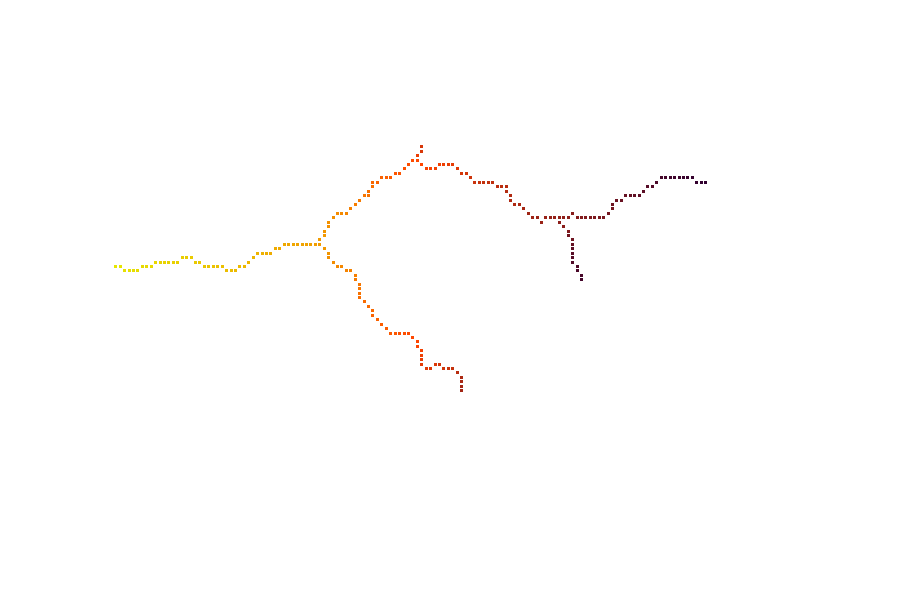

In [162]:
#tf.shade(cvs.points(df, 'x', 'y', agg=reductions.mean('elevation')))

aggr = reductions.mean('elevation')
img = cvs.points(df, 'x', 'y',agg=aggr)
tfimg = tf.shade(img, cmap=[(230,230,0), "orangered", "#300030"])
tf.spread(tfimg)


#tf.shade(agg = reductions.mean('elevation'), cmap=[(230,230,0), "orangered", "#300030"])
#img = tf.shade(cvs.points(df, 'x', 'y')

#tf.spread(img)

In [200]:
import bokeh.plotting as bp
from datashader.bokeh_ext import InteractiveImage

bp.output_notebook()

#Bokeh figure, set data source
source=ColumnDataSource(df)




#p = bp.figure(tools='pan,wheel_zoom,reset', x_range=x_range, y_range=y_range)

#p.circle(pdata['x'], pdata['y'], source=source, color='red', size=6)

#setting interactive plot
#my_hover = HoverTool()
#my_hover.tooltips = [('Elevation (m)', '@elevation'), ('Chi (X)', '@chi')]
#p.add_tools(my_hover)



#function to create datashader image
def image_callback(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'x', 'y', ds.reductions.mean('elevation'))
    img = tf.shade(agg)
    return tf.spread(img)#, threshold=0.80)





p = bp.figure(x_range=x_range, y_range=y_range)
p.circle(df['x'][0],df['y'][0], source=source, color='red', size=20)


#interactive image for the raster
#InteractiveImage(p, basic_raster)



#image_callback((314000,332000),(3368000,3380000), 2000, 2000)

#interactive image for the stream
InteractiveImage(p, image_callback)

Loading BokehJS ...

In [252]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS



# Basic plot setup
p = figure(width=600, height=300, title='Hover over points')
p.circle(df['x'], df['y'])#, line_dash="4 4", line_width=1, color='gray')

# Add a circle, that is visible only when selected
#source = ColumnDataSource(df)
#invisible_circle = Circle(x = 'x', y = 'y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
#visible_circle = Circle(x = 'x', y ='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
#cr = p.add_glyph(source, invisible_circle, selection_glyph=visible_circle, nonselection_glyph=invisible_circle)

# Add a hover tool, that selects the circle
#code = "source.set('selected', cb_data['index']);"
#callback = CustomJS(args={'source': source}, code=code)
#p.add_tools(HoverTool(tooltips=None, callback=callback, renderers=[cr], mode='hline'))

show(p)

AttributeError: 'InteractiveImage' object has no attribute 'references'

In [260]:
bp.output_notebook()
p = figure(width=600, height=300, x_axis_type="datetime", tools="", toolbar_location=None, title='Hover over points')
p.circle(x, y, line_dash="4 4", line_width=1, color='gray')


Loading BokehJS ...

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [224]:
df1 = df[['x','y']]

In [233]:
df.loc[:, 'x':'y']

x            y
0    328128.8534  3376368.352
1    328040.0409  3376368.352
2    327951.2284  3376368.352
3    327862.4159  3376457.102
4    327773.6034  3376457.102
5    327684.7909  3376457.102
6    327595.9784  3376457.102
7    327507.1659  3376457.102
8    327418.3534  3376457.102
9    327329.5409  3376457.102
10   327240.7284  3376457.102
11   327151.9159  3376368.352
12   327063.1034  3376279.602
13   326974.2909  3376279.602
14   326885.4784  3376190.602
15   326796.6659  3376101.852
16   326707.8222  3376101.852
17   326619.0097  3376101.852
18   326530.1972  3376101.852
19   326441.3847  3376013.102
20   326352.5722  3376013.102
21   326263.7597  3375924.352
22   326263.7597  3375835.352
23   326174.9472  3375746.602
24   326086.1347  3375657.852
25   325997.3222  3375657.852
26   325908.5097  3375657.852
27   325819.6972  3375657.852
28   325730.8847  3375657.852
29   325642.0722  3375657.852
..           ...          ...
459  318892.1972  3374680.852
460  318803.3847  3374680.852
461  318714.5722  3374592.102
462  318625.7597  3374592.102
463  318536.9472  3374592.102
464  318448.1347  3374680.852
465  318359.2909  3374680.852
466  318270.4784  3374680.852
467  318181.6659  3374680.852
468  318092.8534  3374680.852
469  318004.0409  3374769.602
470  317915.2284  3374769.602
471  317826.4159  3374858.602
472  317737.6034  3374858.602
473  317648.7909  3374858.602
474  317559.9784  3374769.602
475  317471.1659  3374769.602
476  317382.3534  3374769.602
477  317293.5409  3374769.602
478  317204.7284  3374769.602
479  317115.9159  3374769.602
480  317027.1034  3374680.852
481  316938.2909  3374680.852
482  316849.4784  3374680.852
483  316760.6659  3374592.102
484  316671.8534  3374592.102
485  316583.0097  3374592.102
486  316494.1972  3374592.102
487  316405.3847  3374680.852
488  316316.5722  3374680.852

[489 rows x 2 columns]